In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import requests
import lxml.html as lh

In [3]:
URL='https://meta.wikimedia.org/wiki/List_of_Wikipedias'
#to handle the contents of the website
tables = pd.read_html(URL,match="Admins")
print("There are : ",len(tables)," tables")
print("Take look at table 0")
tables[0]

There are :  9  tables
Take look at table 0


,№,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth
0,1,English,English,en,6211700,52174108,990626605,1119,40556353,132118,892786,1040
1,2,Cebuano,Sinugboanong Binisaya,ceb,5437493,9985706,30244670,6,74011,157,0,2
2,3,Swedish,Svenska,sv,3498012,7537716,48488614,61,754686,2575,0,9
3,4,German,Deutsch,de,2512816,7001370,205315194,190,3599931,19124,129929,94
4,5,French,Français,fr,2279680,11079152,177376905,159,3962505,21013,62977,239
5,6,Dutch,Nederlands,nl,2043430,4288691,57634054,36,1110557,4110,20,16
6,7,Russian,Русский,ru,1684341,6423142,110887973,83,2886358,11861,229604,137
7,8,Italian,Italiano,it,1660137,6884366,117082778,113,2057298,9163,140347,168
8,9,Spanish,Español,es,1647893,7271708,131376949,67,6065811,17113,0,210
9,10,Polish,Polski,pl,1445615,3322549,61507746,102,1072188,4687,278,31


In [4]:
df = pd.DataFrame()
URL = "https://meta.wikimedia.org/wiki/List_of_Wikipedias"
tables = pd.read_html(URL,match="Admins")
#in order concat differnet tables 
df = pd.concat([i for i in tables], ignore_index=True)
    

In [5]:
df.head()

,№,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth
0,1.0,English,English,en,6211700,52174108,990626605,1119,40556353,132118.0,892786,1040
1,2.0,Cebuano,Sinugboanong Binisaya,ceb,5437493,9985706,30244670,6,74011,157.0,0,2
2,3.0,Swedish,Svenska,sv,3498012,7537716,48488614,61,754686,2575.0,0,9
3,4.0,German,Deutsch,de,2512816,7001370,205315194,190,3599931,19124.0,129929,94
4,5.0,French,Français,fr,2279680,11079152,177376905,159,3962505,21013.0,62977,239


In [6]:
df.shape

(315, 12)

In [7]:
df.Language.value_counts()

Awadhi                 1
Hindi                  1
Adyghe                 1
Old Church Slavonic    1
Dutch Low Saxon        1
                      ..
Classical Chinese      1
Latin                  1
Tok Pisin              1
Tibetan                1
French                 1
Name: Language, Length: 314, dtype: int64

In [8]:
df.Language.nunique()

314

In [9]:
df.Wiki.nunique()

314

In [10]:
#to download data from githup for language and countries
url = 'https://raw.githubusercontent.com/annexare/Countries/master/data/countries.json'
count_lang = pd.read_json(url).T

In [11]:
count_lang.head()

,name,native,phone,continent,capital,currency,languages
AD,Andorra,Andorra,376,EU,Andorra la Vella,EUR,[ca]
AE,United Arab Emirates,دولة الإمارات العربية المتحدة,971,AS,Abu Dhabi,AED,[ar]
AF,Afghanistan,افغانستان,93,AS,Kabul,AFN,"[ps, uz, tk]"
AG,Antigua and Barbuda,Antigua and Barbuda,1268,NA,Saint John's,XCD,[en]
AI,Anguilla,Anguilla,1264,NA,The Valley,XCD,[en]


In [12]:
count_lang.languages.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[en]                50
[fr]                20
[es]                16
[ar]                16
[pt]                 8
                    ..
[es, en]             1
[en, fj, hi, ur]     1
[ne]                 1
[ca]                 1
[en, ss]             1
Name: languages, Length: 126, dtype: int64

In [13]:
#to check if there is any empty list at languages column
count_lang[count_lang.languages.apply(lambda x: len(x)<1)]

,name,native,phone,continent,capital,currency,languages
AQ,Antarctica,Antarctica,672,AN,,,[]


In [14]:
#drop Antarctica
count_lang.drop('AQ', inplace=True)

In [15]:
#to get first value from the list at languages column
count_lang['first_language']=count_lang.languages.apply(lambda x: x[0])

In [16]:
count_lang.sample(10)

,name,native,phone,continent,capital,currency,languages,first_language
KH,Cambodia,Kâmpŭchéa,855,AS,Phnom Penh,KHR,[km],km
PE,Peru,Perú,51,SA,Lima,PEN,[es],es
NZ,New Zealand,New Zealand,64,OC,Wellington,NZD,"[en, mi]",en
NO,Norway,Norge,47,EU,Oslo,NOK,"[no, nb, nn]",no
CU,Cuba,Cuba,53,NA,Havana,"CUC,CUP",[es],es
AL,Albania,Shqipëria,355,EU,Tirana,ALL,[sq],sq
PN,Pitcairn Islands,Pitcairn Islands,64,OC,Adamstown,NZD,[en],en
SE,Sweden,Sverige,46,EU,Stockholm,SEK,[sv],sv
CL,Chile,Chile,56,SA,Santiago,"CLF,CLP",[es],es
UA,Ukraine,Україна,380,EU,Kyiv,UAH,[uk],uk


In [17]:
#to assign a country for each wiki language
wiki = pd.merge(count_lang, df, right_on='Wiki', left_on='first_language' )

In [18]:
#to remove some feature of count_lang from wiki
list(count_lang.columns)

['name',
 'native',
 'phone',
 'continent',
 'capital',
 'currency',
 'languages',
 'first_language']

In [19]:
#dropping some features
wiki.drop([
 'native',
 'phone',
 'capital',
 'currency',
 'languages',
 'first_language'], axis=1, inplace=True)

In [20]:
wiki.sample(10)

,name,continent,№,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth
198,Faroe Islands,EU,135.0,Faroese,Føroyskt,fo,13455,39605,361722,4,23826,33.0,0,34
14,Palestine,AS,16.0,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218
72,New Zealand,OC,1.0,English,English,en,6211700,52174108,990626605,1119,40556353,132118.0,892786,1040
195,Eritrea,AF,303.0,Tigrinya,ትግርኛ,ti,205,2102,21626,2,7204,9.0,0,--
169,Saint Pierre and Miquelon,NA,5.0,French,Français,fr,2279680,11079152,177376905,159,3962505,21013.0,62977,239
73,Papua New Guinea,OC,1.0,English,English,en,6211700,52174108,990626605,1119,40556353,132118.0,892786,1040
62,Marshall Islands,OC,1.0,English,English,en,6211700,52174108,990626605,1119,40556353,132118.0,892786,1040
100,Angola,AF,18.0,Portuguese,Português,pt,1049536,5110044,59869521,72,2507438,9810.0,57124,175
189,Taiwan,AS,15.0,Chinese,中文,zh,1165113,6435522,63026449,80,3029079,7977.0,54568,200
163,Madagascar,AF,5.0,French,Français,fr,2279680,11079152,177376905,159,3962505,21013.0,62977,239


In [21]:
wiki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              249 non-null    object 
 1   continent         249 non-null    object 
 2   №                 249 non-null    float64
 3   Language          249 non-null    object 
 4   Language (local)  249 non-null    object 
 5   Wiki              249 non-null    object 
 6   Articles          249 non-null    object 
 7   Total             249 non-null    object 
 8   Edits             249 non-null    object 
 9   Admins            249 non-null    object 
 10  Users             249 non-null    object 
 11  Active Users      249 non-null    float64
 12  Files             249 non-null    object 
 13  Depth             249 non-null    object 
dtypes: float64(2), object(12)
memory usage: 29.2+ KB


In [22]:
#to change some feature from wiki
list(wiki.columns)

['name',
 'continent',
 '№',
 'Language',
 'Language (local)',
 'Wiki',
 'Articles',
 'Total',
 'Edits',
 'Admins',
 'Users',
 'Active Users',
 'Files',
 'Depth']

In [23]:
#dropping 'No' feature from wiki
wiki.drop('№', axis=1, inplace=True)

In [24]:
#changing var type of some variables
wiki[['Articles',
 'Total',
 'Edits',
 'Admins',
 'Users',
 ]] = wiki[['Articles',
 'Total',
 'Edits',
 'Admins',
 'Users',
]].astype('int')


In [25]:
#groupping by language 
wiki_language = wiki.groupby('Language').mean()
wiki_language

,Articles,Total,Edits,Admins,Users,Active Users
Language,,,,,,
Afrikaans,95287,346777,2348737,18,130361,191.0
Albanian,81857,243297,2164089,13,128247,318.0
Amharic,14905,45650,361601,3,33448,43.0
Arabic,1095558,7056920,51932633,26,1972226,5945.0
Armenian,279182,943532,7565722,11,105015,673.0
...,...,...,...,...,...,...
Turkish,384522,1917558,24387967,26,1249422,3424.0
Turkmen,5850,14002,214582,1,20680,44.0
Ukrainian,1062442,3648141,30268872,47,536504,3525.0


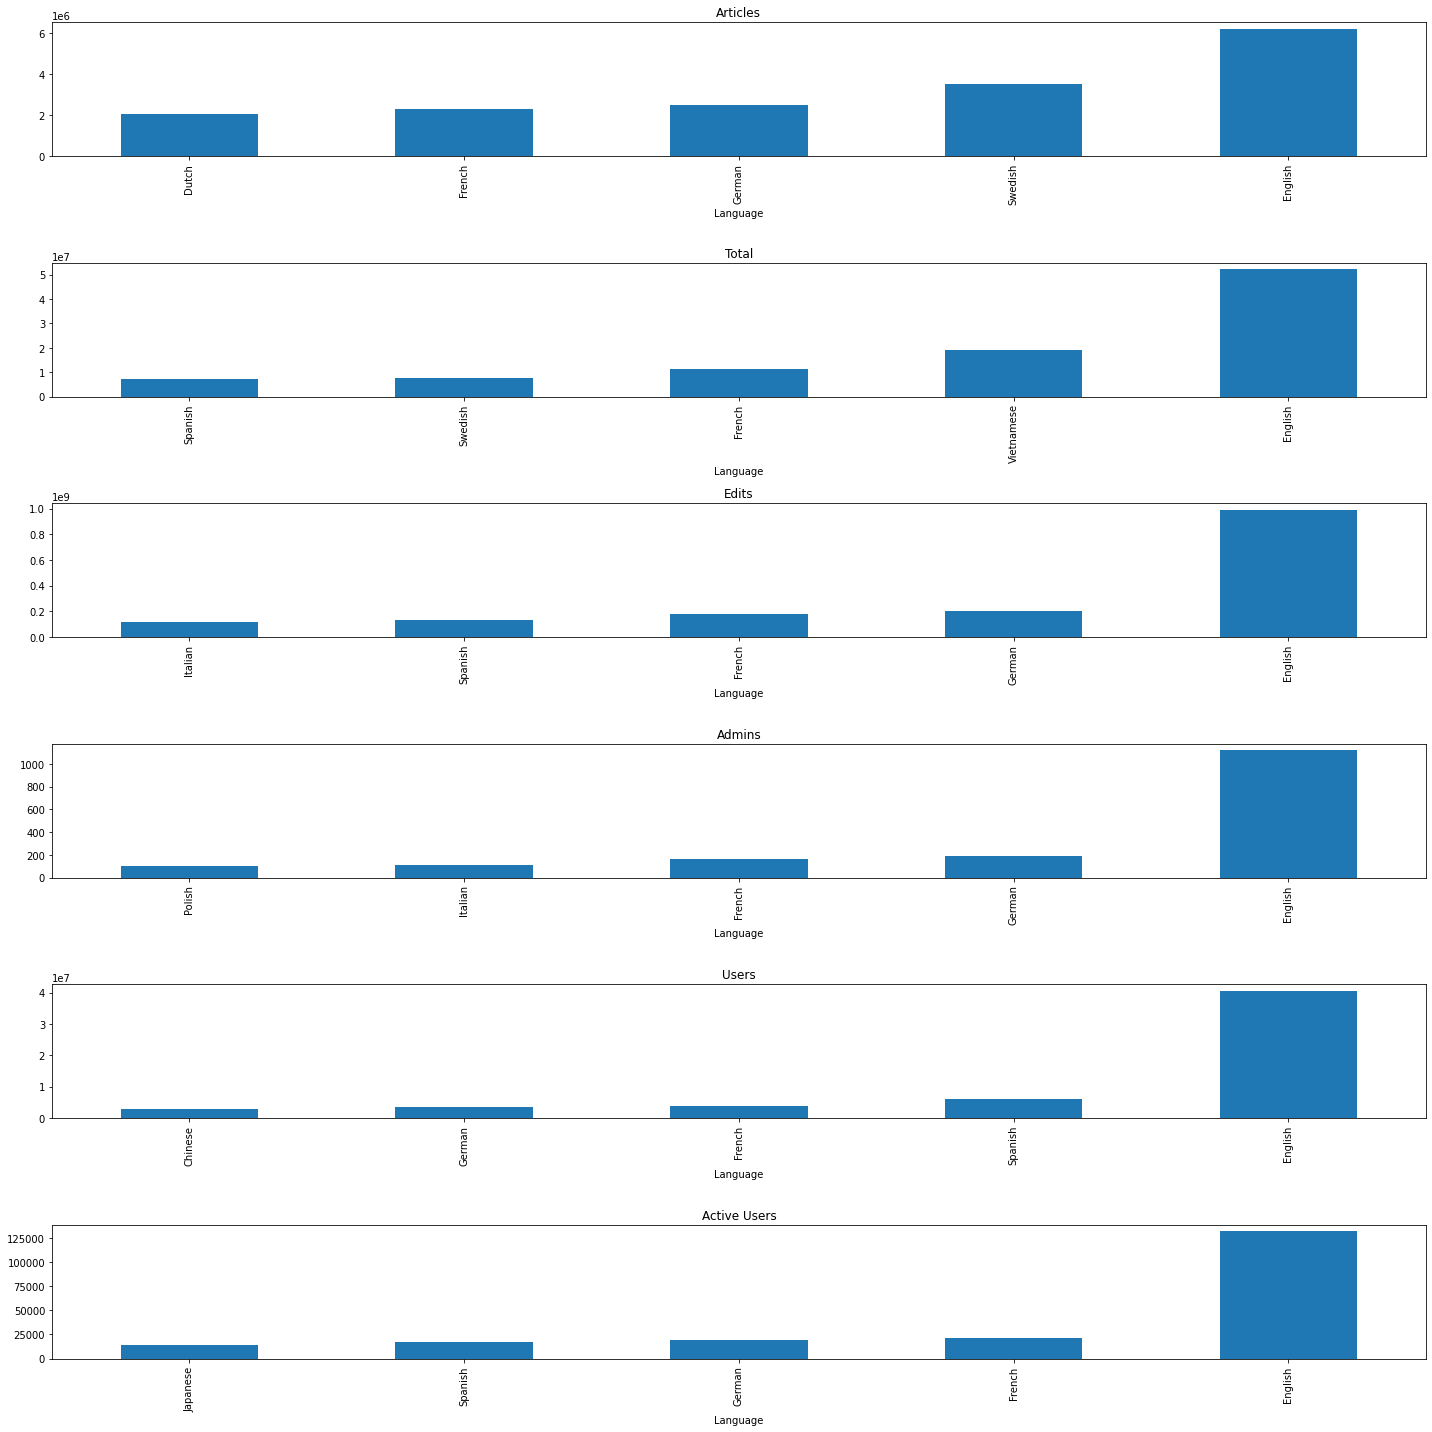

In [26]:
#visualize groups by languages
fig, (ax0, ax1, ax2, ax3,ax4,ax5) = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
wiki_language['Articles'].sort_values().tail(5).plot.bar(ax=ax0)
ax0.set_title('Articles')
wiki_language['Total'].sort_values().tail(5).plot.bar(ax=ax1)
ax1.set_title('Total')
wiki_language['Edits'].sort_values().tail(5).plot.bar(ax=ax2)
ax2.set_title('Edits')
wiki_language['Admins'].sort_values().tail(5).plot.bar(ax=ax3)
ax3.set_title('Admins')
wiki_language['Users'].sort_values().tail(5).plot.bar(ax=ax4)
ax4.set_title('Users')
wiki_language['Active Users'].sort_values().tail(5).plot.bar(ax=ax5)
ax5.set_title('Active Users')
plt.tight_layout()

In [27]:
#to download data from githup for population and countries
url = 'https://raw.githubusercontent.com/datasets/population/master/data/population.csv'
pop = pd.read_csv(url)
pop

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


In [28]:
#getting population from 2o18
pop=pop[pop['Year']==2018]
pop

,Country Name,Country Code,Year,Value
58,Arab World,ARB,2018,419790588
117,Caribbean small states,CSS,2018,7358965
176,Central Europe and the Baltics,CEB,2018,102511922
235,Early-demographic dividend,EAR,2018,3249140605
294,East Asia & Pacific,EAS,2018,2328220870
...,...,...,...,...
15202,Virgin Islands (U.S.),VIR,2018,106977
15231,West Bank and Gaza,PSE,2018,4569087
15290,"Yemen, Rep.",YEM,2018,28498687
15349,Zambia,ZMB,2018,17351822


In [29]:
#dropping 'Country Code' feature from pop
pop.drop('Country Code', axis=1, inplace=True)
pop

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country Name,Year,Value
58,Arab World,2018,419790588
117,Caribbean small states,2018,7358965
176,Central Europe and the Baltics,2018,102511922
235,Early-demographic dividend,2018,3249140605
294,East Asia & Pacific,2018,2328220870
...,...,...,...
15202,Virgin Islands (U.S.),2018,106977
15231,West Bank and Gaza,2018,4569087
15290,"Yemen, Rep.",2018,28498687
15349,Zambia,2018,17351822


In [30]:
#renaming 'Value' as 'population'
pop.rename(columns={'Value':'population'}, inplace=True)
pop

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country Name,Year,population
58,Arab World,2018,419790588
117,Caribbean small states,2018,7358965
176,Central Europe and the Baltics,2018,102511922
235,Early-demographic dividend,2018,3249140605
294,East Asia & Pacific,2018,2328220870
...,...,...,...
15202,Virgin Islands (U.S.),2018,106977
15231,West Bank and Gaza,2018,4569087
15290,"Yemen, Rep.",2018,28498687
15349,Zambia,2018,17351822


In [31]:
#to assign a population of country for each wiki language
wiki=pd.merge(wiki, pop, right_on='Country Name', left_on='name')
wiki

,name,continent,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth,Country Name,Year,population
0,Andorra,EU,Catalan,Català,ca,666384,1644189,25694190,22,373121,1684.0,13621,34,Andorra,2018,77006
1,United Arab Emirates,AS,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,United Arab Emirates,2018,9630959
2,Bahrain,AS,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,Bahrain,2018,1569439
3,Algeria,AF,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,Algeria,2018,42228429
4,Iraq,AS,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,Iraq,2018,38433600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Uzbekistan,AS,Uzbek,O‘zbek,uz,139172,632197,2155067,11,58120,356.0,1554,43,Uzbekistan,2018,32955400
179,Vietnam,AS,Vietnamese,Tiếng Việt,vi,1259868,19217343,64107887,20,778732,2045.0,22431,--,Vietnam,2018,95540395
180,Vanuatu,OC,Bislama,Bislama,bi,1241,2986,38446,1,10321,12.0,0,25,Vanuatu,2018,292680
181,Samoa,OC,Samoan,Gagana Samoa,sm,975,3063,41019,1,8477,11.0,0,61,Samoa,2018,196130


In [32]:
#groupping by language 
df_wiki = wiki.groupby('Language').mean()[['Articles','Total','Edits','Admins','Users','Active Users']]
df_wiki

,Articles,Total,Edits,Admins,Users,Active Users
Language,,,,,,
Afrikaans,95287.0,346777.0,2348737.0,18.0,130361.0,191.0
Albanian,81857.0,243297.0,2164089.0,13.0,128247.0,318.0
Amharic,14905.0,45650.0,361601.0,3.0,33448.0,43.0
Arabic,1095558.0,7056920.0,51932633.0,26.0,1972226.0,5945.0
Armenian,279182.0,943532.0,7565722.0,11.0,105015.0,673.0
...,...,...,...,...,...,...
Turkish,384522.0,1917558.0,24387967.0,26.0,1249422.0,3424.0
Turkmen,5850.0,14002.0,214582.0,1.0,20680.0,44.0
Ukrainian,1062442.0,3648141.0,30268872.0,47.0,536504.0,3525.0


In [33]:
#adding population as sum to dataframe 
df_wiki['pop_total']=wiki.groupby('Language').sum()[['population']]
df_wiki

,Articles,Total,Edits,Admins,Users,Active Users,pop_total
Language,,,,,,,
Afrikaans,95287.0,346777.0,2348737.0,18.0,130361.0,191.0,57779622
Albanian,81857.0,243297.0,2164089.0,13.0,128247.0,318.0,4711676
Amharic,14905.0,45650.0,361601.0,3.0,33448.0,43.0,109224559
Arabic,1095558.0,7056920.0,51932633.0,26.0,1972226.0,5945.0,255425862
Armenian,279182.0,943532.0,7565722.0,11.0,105015.0,673.0,2951776
...,...,...,...,...,...,...,...
Turkish,384522.0,1917558.0,24387967.0,26.0,1249422.0,3424.0,82319724
Turkmen,5850.0,14002.0,214582.0,1.0,20680.0,44.0,5850908
Ukrainian,1062442.0,3648141.0,30268872.0,47.0,536504.0,3525.0,44622516


In [34]:
#finding ratio of each colums to population total
df_wiki['ratio_Total']= df_wiki['Total']/df_wiki['pop_total']
df_wiki['ratio_Articles']= df_wiki['Articles']/df_wiki['pop_total']
df_wiki['ratio_Edits']= df_wiki['Edits']/df_wiki['pop_total']
df_wiki['ratio_Admins']= df_wiki['Admins']/df_wiki['pop_total']
df_wiki['ratio_Users']= df_wiki['Users']/df_wiki['pop_total']
df_wiki['ratio_Active_Users']= df_wiki['Active Users']/df_wiki['pop_total']

In [35]:
df_wiki

,Articles,Total,Edits,Admins,Users,Active Users,pop_total,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
Afrikaans,95287.0,346777.0,2348737.0,18.0,130361.0,191.0,57779622,0.006002,0.001649,0.040650,3.115285e-07,0.002256,3.305664e-06
Albanian,81857.0,243297.0,2164089.0,13.0,128247.0,318.0,4711676,0.051637,0.017373,0.459303,2.759103e-06,0.027219,6.749191e-05
Amharic,14905.0,45650.0,361601.0,3.0,33448.0,43.0,109224559,0.000418,0.000136,0.003311,2.746635e-08,0.000306,3.936844e-07
Arabic,1095558.0,7056920.0,51932633.0,26.0,1972226.0,5945.0,255425862,0.027628,0.004289,0.203318,1.017908e-07,0.007721,2.327486e-05
Armenian,279182.0,943532.0,7565722.0,11.0,105015.0,673.0,2951776,0.319649,0.094581,2.563108,3.726570e-06,0.035577,2.279983e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkish,384522.0,1917558.0,24387967.0,26.0,1249422.0,3424.0,82319724,0.023294,0.004671,0.296259,3.158417e-07,0.015178,4.159392e-05
Turkmen,5850.0,14002.0,214582.0,1.0,20680.0,44.0,5850908,0.002393,0.001000,0.036675,1.709136e-07,0.003534,7.520200e-06
Ukrainian,1062442.0,3648141.0,30268872.0,47.0,536504.0,3525.0,44622516,0.081756,0.023810,0.678332,1.053280e-06,0.012023,7.899599e-05


In [36]:
df_wiki.sort_values('ratio_Articles', ascending=False).head(50)

,Articles,Total,Edits,Admins,Users,Active Users,pop_total,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
Catalan,666384.0,1644189.0,25694190.0,22.0,373121.0,1684.0,77006,21.351440,8.653663,333.664779,2.856920e-04,4.845350,0.021868
Swedish,3498012.0,7537716.0,48488614.0,61.0,754686.0,2575.0,10175214,0.740792,0.343778,4.765366,5.994960e-06,0.074169,0.000253
Faroese,13455.0,39605.0,361722.0,4.0,23826.0,33.0,48497,0.816648,0.277440,7.458647,8.247933e-05,0.491288,0.000680
Estonian,214169.0,511091.0,5769868.0,33.0,146470.0,692.0,1321977,0.386611,0.162007,4.364575,2.496261e-05,0.110796,0.000523
Icelandic,51291.0,134343.0,1690544.0,29.0,76530.0,165.0,352721,0.380876,0.145415,4.792865,8.221796e-05,0.216970,0.000468
Norwegian (Bokmål),546734.0,1496332.0,20963642.0,37.0,509988.0,1315.0,5311916,0.281693,0.102926,3.946531,6.965472e-06,0.096008,0.000248
Armenian,279182.0,943532.0,7565722.0,11.0,105015.0,673.0,2951776,0.319649,0.094581,2.563108,3.726570e-06,0.035577,0.000228
Finnish,499180.0,1324871.0,19372531.0,33.0,466603.0,1713.0,5515525,0.240208,0.090505,3.512364,5.983111e-06,0.084598,0.000311
Serbian,641204.0,3935272.0,23466264.0,20.0,275929.0,957.0,7604831,0.517470,0.084315,3.085705,2.629907e-06,0.036283,0.000126


In [37]:
#getting ratio columns
df_wiki_ratio = df_wiki[['ratio_Total','ratio_Articles','ratio_Edits','ratio_Admins','ratio_Users','ratio_Active_Users']]
df_wiki_ratio

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
Afrikaans,0.006002,0.001649,0.040650,3.115285e-07,0.002256,3.305664e-06
Albanian,0.051637,0.017373,0.459303,2.759103e-06,0.027219,6.749191e-05
Amharic,0.000418,0.000136,0.003311,2.746635e-08,0.000306,3.936844e-07
Arabic,0.027628,0.004289,0.203318,1.017908e-07,0.007721,2.327486e-05
Armenian,0.319649,0.094581,2.563108,3.726570e-06,0.035577,2.279983e-04
...,...,...,...,...,...,...
Turkish,0.023294,0.004671,0.296259,3.158417e-07,0.015178,4.159392e-05
Turkmen,0.002393,0.001000,0.036675,1.709136e-07,0.003534,7.520200e-06
Ukrainian,0.081756,0.023810,0.678332,1.053280e-06,0.012023,7.899599e-05


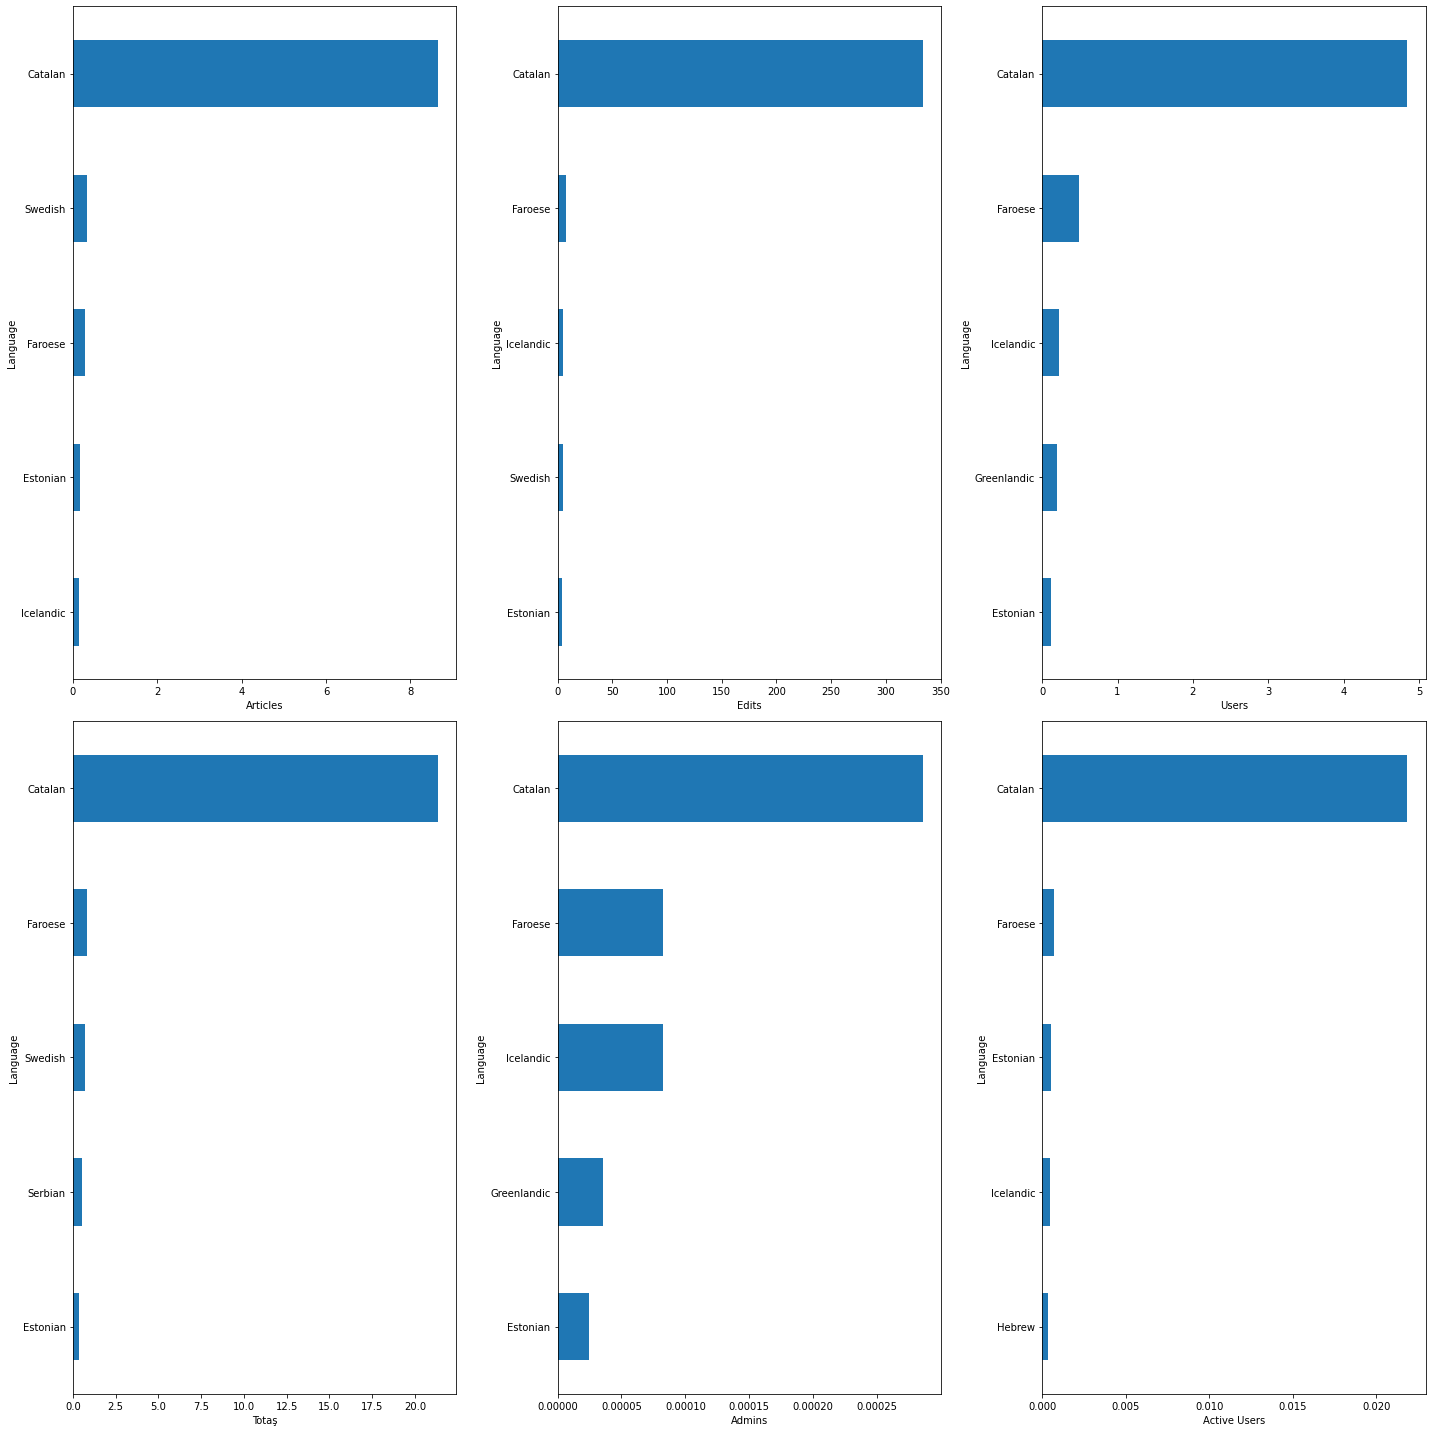

In [38]:
#visualize groups by languages
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
df_wiki_ratio['ratio_Articles'].sort_values().tail(5).plot.barh(ax=axs[0,0])
axs[0,0].set_xlabel('Articles')
df_wiki_ratio['ratio_Total'].sort_values().tail(5).plot.barh(ax=axs[1,0])
axs[1,0].set_xlabel('Totaş')
df_wiki_ratio['ratio_Edits'].sort_values().tail(5).plot.barh(ax=axs[0,1])
axs[0,1].set_xlabel('Edits')
df_wiki_ratio['ratio_Admins'].sort_values().tail(5).plot.barh(ax=axs[1,1])
axs[1,1].set_xlabel('Admins')
df_wiki_ratio['ratio_Users'].sort_values().tail(5).plot.barh(ax=axs[0,2])
axs[0,2].set_xlabel('Users')
df_wiki_ratio['ratio_Active_Users'].sort_values().tail(5).plot.barh(ax=axs[1,2])
axs[1,2].set_xlabel('Active Users')
plt.tight_layout()

In [39]:
#eliminating small countries
wiki_bigger = wiki[wiki['population']>1000000]
wiki_bigger


,name,continent,Language,Language (local),Wiki,Articles,Total,Edits,Admins,Users,Active Users,Files,Depth,Country Name,Year,population
1,United Arab Emirates,AS,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,United Arab Emirates,2018,9630959
2,Bahrain,AS,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,Bahrain,2018,1569439
3,Algeria,AF,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,Algeria,2018,42228429
4,Iraq,AS,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,Iraq,2018,38433600
5,Jordan,AS,Arabic,العربية,ar,1095558,7056920,51932633,26,1972226,5945.0,38148,218,Jordan,2018,9956011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Tanzania,AF,Swahili,Kiswahili,sw,60271,125010,1133560,14,45294,128.0,2250,10,Tanzania,2018,56318348
177,Ukraine,EU,Ukrainian,Українська,uk,1062442,3648141,30268872,47,536504,3525.0,112353,49,Ukraine,2018,44622516
178,Uzbekistan,AS,Uzbek,O‘zbek,uz,139172,632197,2155067,11,58120,356.0,1554,43,Uzbekistan,2018,32955400
179,Vietnam,AS,Vietnamese,Tiếng Việt,vi,1259868,19217343,64107887,20,778732,2045.0,22431,--,Vietnam,2018,95540395


In [40]:
#groupping by language 
df_wiki_bigger = wiki_bigger.groupby('Language').mean()[['Articles','Total','Edits','Admins','Users','Active Users']]
df_wiki_bigger

,Articles,Total,Edits,Admins,Users,Active Users
Language,,,,,,
Afrikaans,95287.0,346777.0,2348737.0,18.0,130361.0,191.0
Albanian,81857.0,243297.0,2164089.0,13.0,128247.0,318.0
Amharic,14905.0,45650.0,361601.0,3.0,33448.0,43.0
Arabic,1095558.0,7056920.0,51932633.0,26.0,1972226.0,5945.0
Armenian,279182.0,943532.0,7565722.0,11.0,105015.0,673.0
Azerbaijani,175856.0,459049.0,5647109.0,16.0,211933.0,1134.0
Belarusian,199538.0,599830.0,3750574.0,10.0,101885.0,280.0
Bengali,99761.0,880121.0,4757207.0,12.0,311773.0,1093.0
Bosnian,84686.0,351553.0,3229138.0,10.0,129111.0,185.0


In [41]:
#adding population as sum to dataframe 
df_wiki_bigger['pop_total']=wiki_bigger.groupby('Language').sum()[['population']]
df_wiki_bigger

,Articles,Total,Edits,Admins,Users,Active Users,pop_total
Language,,,,,,,
Afrikaans,95287.0,346777.0,2348737.0,18.0,130361.0,191.0,57779622
Albanian,81857.0,243297.0,2164089.0,13.0,128247.0,318.0,4711676
Amharic,14905.0,45650.0,361601.0,3.0,33448.0,43.0,109224559
Arabic,1095558.0,7056920.0,51932633.0,26.0,1972226.0,5945.0,254593540
Armenian,279182.0,943532.0,7565722.0,11.0,105015.0,673.0,2951776
Azerbaijani,175856.0,459049.0,5647109.0,16.0,211933.0,1134.0,9939800
Belarusian,199538.0,599830.0,3750574.0,10.0,101885.0,280.0,9483499
Bengali,99761.0,880121.0,4757207.0,12.0,311773.0,1093.0,161356039
Bosnian,84686.0,351553.0,3229138.0,10.0,129111.0,185.0,3323929


In [42]:
#finding ratio of each colums to population total
df_wiki_bigger['ratio_Total']= df_wiki_bigger['Total']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Articles']= df_wiki_bigger['Articles']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Edits']= df_wiki_bigger['Edits']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Admins']= df_wiki_bigger['Admins']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Users']= df_wiki_bigger['Users']/df_wiki_bigger['pop_total']
df_wiki_bigger['ratio_Active_Users']= df_wiki_bigger['Active Users']/df_wiki_bigger['pop_total']
df_wiki_bigger

,Articles,Total,Edits,Admins,Users,Active Users,pop_total,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
Afrikaans,95287.0,346777.0,2348737.0,18.0,130361.0,191.0,57779622,0.006002,0.001649,0.040650,3.115285e-07,0.002256,3.305664e-06
Albanian,81857.0,243297.0,2164089.0,13.0,128247.0,318.0,4711676,0.051637,0.017373,0.459303,2.759103e-06,0.027219,6.749191e-05
Amharic,14905.0,45650.0,361601.0,3.0,33448.0,43.0,109224559,0.000418,0.000136,0.003311,2.746635e-08,0.000306,3.936844e-07
Arabic,1095558.0,7056920.0,51932633.0,26.0,1972226.0,5945.0,254593540,0.027718,0.004303,0.203983,1.021236e-07,0.007747,2.335095e-05
Armenian,279182.0,943532.0,7565722.0,11.0,105015.0,673.0,2951776,0.319649,0.094581,2.563108,3.726570e-06,0.035577,2.279983e-04
Azerbaijani,175856.0,459049.0,5647109.0,16.0,211933.0,1134.0,9939800,0.046183,0.017692,0.568131,1.609690e-06,0.021322,1.140868e-04
Belarusian,199538.0,599830.0,3750574.0,10.0,101885.0,280.0,9483499,0.063250,0.021041,0.395484,1.054463e-06,0.010743,2.952497e-05
Bengali,99761.0,880121.0,4757207.0,12.0,311773.0,1093.0,161356039,0.005455,0.000618,0.029483,7.436970e-08,0.001932,6.773840e-06
Bosnian,84686.0,351553.0,3229138.0,10.0,129111.0,185.0,3323929,0.105764,0.025478,0.971482,3.008488e-06,0.038843,5.565703e-05


In [43]:
#sorting values according to the number of Articles
df_wiki_bigger.sort_values('Articles', ascending=False)

,Articles,Total,Edits,Admins,Users,Active Users,pop_total,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,,,,,,,,
English,6211700.0,52174108.0,990626605.0,1119.0,40556353.0,132118.0,1223895211,0.042630,0.005075,0.809405,9.142940e-07,0.033137,1.079488e-04
Swedish,3498012.0,7537716.0,48488614.0,61.0,754686.0,2575.0,10175214,0.740792,0.343778,4.765366,5.994960e-06,0.074169,2.530659e-04
German,2512816.0,7001370.0,205315194.0,190.0,3599931.0,19124.0,100259530,0.069832,0.025063,2.047837,1.895082e-06,0.035906,1.907450e-04
French,2279680.0,11079152.0,177376905.0,159.0,3962505.0,21013.0,246716425,0.044906,0.009240,0.718951,6.444646e-07,0.016061,8.517066e-05
Dutch,2043430.0,4288691.0,57634054.0,36.0,1110557.0,4110.0,28664880,0.149615,0.071287,2.010616,1.255892e-06,0.038743,1.433810e-04
Italian,1660137.0,6884366.0,117082778.0,113.0,2057298.0,9163.0,60421760,0.113939,0.027476,1.937758,1.870187e-06,0.034049,1.516507e-04
Spanish,1647893.0,7271708.0,131376949.0,67.0,6065811.0,17113.0,432059130,0.016830,0.003814,0.304072,1.550714e-07,0.014039,3.960800e-05
Polish,1445615.0,3322549.0,61507746.0,102.0,1072188.0,4687.0,37974750,0.087494,0.038068,1.619701,2.685995e-06,0.028234,1.234241e-04
Vietnamese,1259868.0,19217343.0,64107887.0,20.0,778732.0,2045.0,95540395,0.201144,0.013187,0.671003,2.093355e-07,0.008151,2.140456e-05


In [44]:
#getting ratio columns
df_ratio_bigger = df_wiki_bigger[['ratio_Total','ratio_Articles','ratio_Edits','ratio_Admins','ratio_Users','ratio_Active_Users']]
df_ratio_bigger

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
Afrikaans,0.006002,0.001649,0.040650,3.115285e-07,0.002256,3.305664e-06
Albanian,0.051637,0.017373,0.459303,2.759103e-06,0.027219,6.749191e-05
Amharic,0.000418,0.000136,0.003311,2.746635e-08,0.000306,3.936844e-07
Arabic,0.027718,0.004303,0.203983,1.021236e-07,0.007747,2.335095e-05
Armenian,0.319649,0.094581,2.563108,3.726570e-06,0.035577,2.279983e-04
Azerbaijani,0.046183,0.017692,0.568131,1.609690e-06,0.021322,1.140868e-04
Belarusian,0.063250,0.021041,0.395484,1.054463e-06,0.010743,2.952497e-05
Bengali,0.005455,0.000618,0.029483,7.436970e-08,0.001932,6.773840e-06
Bosnian,0.105764,0.025478,0.971482,3.008488e-06,0.038843,5.565703e-05


In [45]:
#sorting values according to the number of ratio of Articles to Population
df_ratio_bigger.sort_values('ratio_Articles', ascending=False)

,ratio_Total,ratio_Articles,ratio_Edits,ratio_Admins,ratio_Users,ratio_Active_Users
Language,,,,,,
Swedish,0.740792,0.343778,4.765366,5.994960e-06,0.074169,2.530659e-04
Estonian,0.386611,0.162007,4.364575,2.496261e-05,0.110796,5.234584e-04
Norwegian (Bokmål),0.281693,0.102926,3.946531,6.965472e-06,0.096008,2.475566e-04
Armenian,0.319649,0.094581,2.563108,3.726570e-06,0.035577,2.279983e-04
Serbian,0.563582,0.091829,3.360675,2.864261e-06,0.039517,1.370549e-04
Finnish,0.240208,0.090505,3.512364,5.983111e-06,0.084598,3.105779e-04
Slovenian,0.198751,0.082246,2.604200,1.012588e-05,0.094482,2.131256e-04
Lithuanian,0.171310,0.071688,2.150243,4.640300e-06,0.053096,1.681216e-04
Dutch,0.149615,0.071287,2.010616,1.255892e-06,0.038743,1.433810e-04


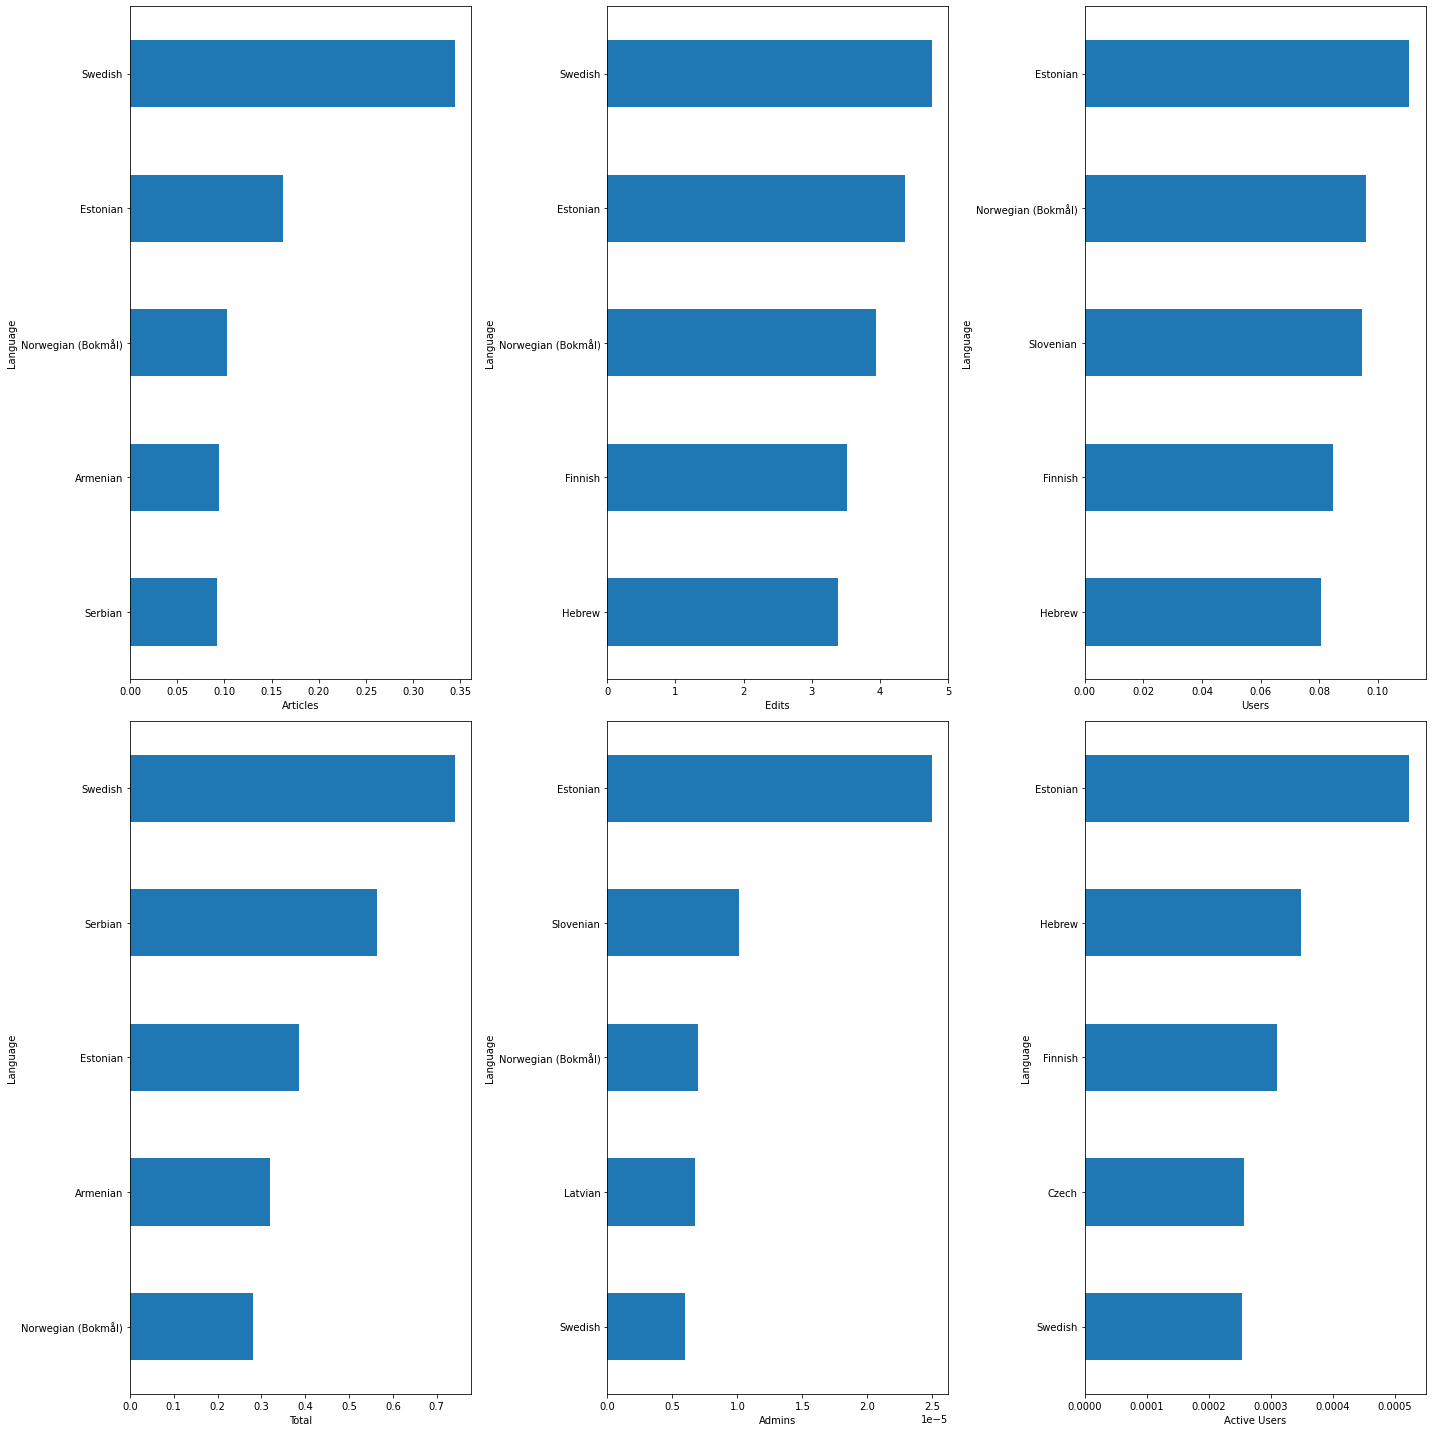

In [46]:
#visualize groups by languages
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
df_ratio_bigger['ratio_Articles'].sort_values().tail(5).plot.barh(ax=axs[0,0])
axs[0,0].set_xlabel('Articles')
df_ratio_bigger['ratio_Total'].sort_values().tail(5).plot.barh(ax=axs[1,0])
axs[1,0].set_xlabel('Total')
df_ratio_bigger['ratio_Edits'].sort_values().tail(5).plot.barh(ax=axs[0,1])
axs[0,1].set_xlabel('Edits')
df_ratio_bigger['ratio_Admins'].sort_values().tail(5).plot.barh(ax=axs[1,1])
axs[1,1].set_xlabel('Admins')
df_ratio_bigger['ratio_Users'].sort_values().tail(5).plot.barh(ax=axs[0,2])
axs[0,2].set_xlabel('Users')
df_ratio_bigger['ratio_Active_Users'].sort_values().tail(5).plot.barh(ax=axs[1,2])
axs[1,2].set_xlabel('Active Users')
plt.tight_layout()